In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv(r"https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
x = df.iloc[:,3:-1]
y = df['Exited']

In [7]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
oe = OrdinalEncoder()

x.loc[:,"Geography":"Gender"] = oe.fit_transform(df.loc[:,"Geography":"Gender"])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52


In [22]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [10]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2, random_state=1)

In [11]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss = 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 5ms/step - loss: 0.4604 - val_loss: 0.4261
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4197 - val_loss: 0.4026
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3959 - val_loss: 0.3804
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3780 - val_loss: 0.3670
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3641 - val_loss: 0.3542
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3570 - val_loss: 0.3488
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3513 - val_loss: 0.3449
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3475 - val_loss: 0.3415
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3449 - val_loss: 0.3377
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3431 - val_lo

In [23]:
ann.history.history

{'loss': [0.4893217086791992,
  0.42453858256340027,
  0.39827921986579895,
  0.37501955032348633,
  0.3619365394115448,
  0.353281170129776,
  0.34756600856781006,
  0.343880295753479,
  0.34229016304016113,
  0.33965930342674255,
  0.33788853883743286,
  0.33636003732681274,
  0.3357056677341461,
  0.33363354206085205,
  0.3327244818210602,
  0.33117255568504333,
  0.33176904916763306,
  0.33004486560821533,
  0.3292795419692993,
  0.32818275690078735,
  0.3277586102485657,
  0.32580748200416565,
  0.32518303394317627,
  0.32508593797683716,
  0.32384803891181946,
  0.32383331656455994,
  0.3237546682357788,
  0.32287654280662537,
  0.32203027606010437,
  0.3215164840221405,
  0.3210723102092743,
  0.3196881115436554,
  0.3203451633453369,
  0.31892630457878113,
  0.319019615650177,
  0.3189117908477783,
  0.31740471720695496,
  0.3168894946575165,
  0.31651589274406433,
  0.31689453125,
  0.3152487874031067,
  0.31615087389945984],
 'val_loss': [0.4352691173553467,
  0.4063682556152

# Early stopping

In [24]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [21]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss = 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.4893 - val_loss: 0.4353
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4245 - val_loss: 0.4064
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3983 - val_loss: 0.3801
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3750 - val_loss: 0.3623
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3619 - val_loss: 0.3531
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3533 - val_loss: 0.3475
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3476 - val_loss: 0.3411
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3439 - val_loss: 0.3387
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3423 - val_loss: 0.3393
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3397 - val_lo

<AxesSubplot:>

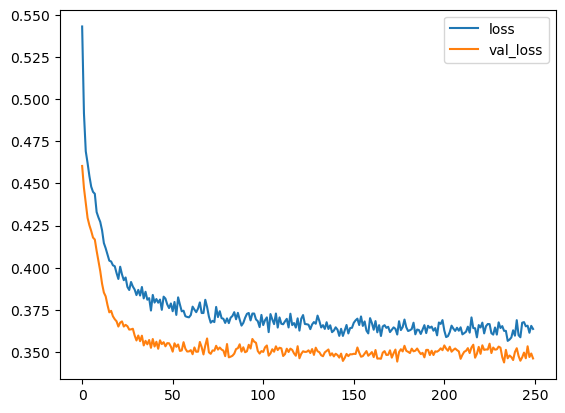

In [16]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

# Drop Out Layer

In [14]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss = 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 5ms/step - loss: 0.5432 - val_loss: 0.4604
Epoch 2/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4916 - val_loss: 0.4473
Epoch 3/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4691 - val_loss: 0.4383
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4621 - val_loss: 0.4295
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4544 - val_loss: 0.4252
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4481 - val_loss: 0.4218
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4450 - val_loss: 0.4179
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4439 - val_loss: 0.4167
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4330 - val_loss: 0.4100
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4298 - val_lo

In [ ]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early stopping + Drop Out layer

In [27]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss = 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 5ms/step - loss: 0.5899 - val_loss: 0.4717
Epoch 2/250
250/250 [==============================] - 1s 4ms/step - loss: 0.5022 - val_loss: 0.4441
Epoch 3/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4825 - val_loss: 0.4356
Epoch 4/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4658 - val_loss: 0.4302
Epoch 5/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4630 - val_loss: 0.4277
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4489 - val_loss: 0.4223
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4469 - val_loss: 0.4199
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4378 - val_loss: 0.4122
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4404 - val_loss: 0.4110
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4326 - val_lo

In [28]:
drop_early_loss = pd.DataFrame(ann.history.history)

<AxesSubplot:>

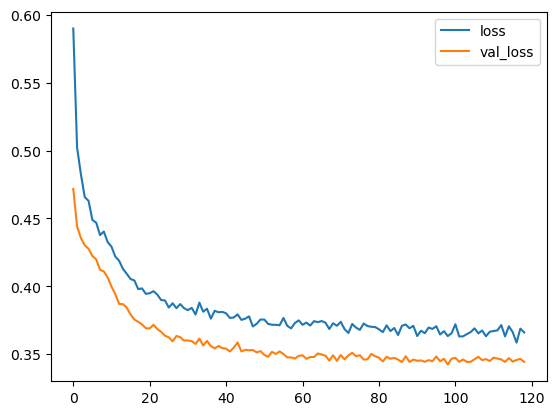

In [29]:
drop_early_loss.plot()

# compare performance

NameError: name 'drop_loss' is not defined

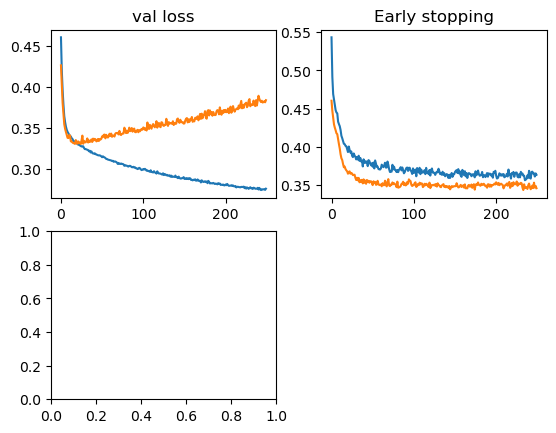

In [34]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('val loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('Dropout layer')

plt.subplot(2,2,4)
plt.plot(drop_early_loss)
plt.title('Dropout+Early stopping')

plt.tight_layout()